<a href="https://colab.research.google.com/github/Nmarinsiruela/Curso-ML-Python/blob/master/NMS_5_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 5 - Clasificación K-Nearest Neighbours


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*

## 0. Precarga de datos y librerías.

In [0]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

In [0]:
wine_data = load_wine()

# print(wine_data.DESCR)

X = wine_data.data
Y = wine_data.target

Y = Y[:, np.newaxis]

## 1. Visualizando KNN
---

Implementar una función ***visualize_KNN($X_1$, $X_2$, $Y$, $k$, $dist$)*** que tome como parámetros de entrada dos variables de entrada $x1$ y $x2$ y el vector de etiquetas $Y$ , para que se encargue de visualizar un scatter plot donde se vean estas dos variables de entradas graficadas, identificando por color el tipo de clase a la que pertenece. Esta función deberá de utilizar los parámetros de entrada $k$ (número de valores a usar por KNN) y $dist$ (tipo de función que mide la distancia entre dos puntos, en este caso la euclídea) para realizar un KNN que prediga la clase para todas las combinaciones de puntos que se pueden generar en dicho scatter plot, para así poder sobreimpresionar un mapa de color que nos muestre la frontera de decisión del modelo. En la siguiente imagen se puede ver un ejemplo del resultado que se espera obtener:

![texto alternativo](http://www.mtechprojects.org/wp-content/uploads/2017/12/k-Nearest-Neighbor.png)

Una vez se haya implementado la función, probar a graficar diferentes variables, para diferentes valores de K.

**Pista:** Puede ser util para este ejercicio conocer las funciones ***np.meshgrid()*** y ***plt.pcolormesh()***.


Number of indexes: 1:13
First index:
5
Second index:
6
K value:
3


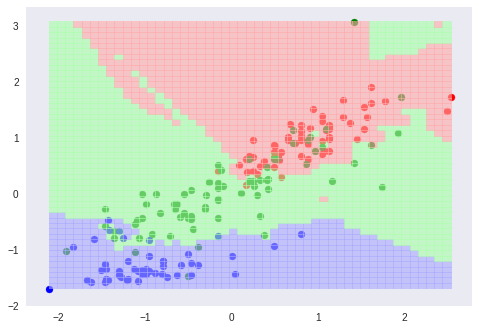

In [10]:
import operator
from matplotlib.colors import ListedColormap
def visualize_knn(x_1, x_2, y, k, dist):
  # Estandarizar valores para reducir valores muy altos problemáticos.
  x_1n = standardize(x_1)
  x_2n = standardize(x_2)

  # Representación de puntos.
  plt.scatter(x_1n[Y==0], x_2n[Y==0], c="r")
  plt.scatter(x_1n[Y==1], x_2n[Y==1], c="g")
  plt.scatter(x_1n[Y==2], x_2n[Y==2], c="b")
  
  # Crear un grid para mostrar todos los puntos
  resolution = 50
  grid_x1 = np.linspace(np.amin(x_1n), np.amax(x_1n), resolution)
  grid_x2 = np.linspace(np.amin(x_2n), np.amax(x_2n), resolution)
  
  xx, yy = np.meshgrid(grid_x1, grid_x2)

  # Aplicar el KNN para obtener la matriz correcta de valores.
  zz = knn(xx, yy, x_1n, x_2n, y, k, dist)

  # Dibujar el grid.
  color = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
  plt.pcolor(xx, yy, zz, alpha=0.6, cmap=color)
  plt.show()
  
# Función principal que aplica el KNN.
def knn(x, y, X1,X2, Y, k, dist):
    n, m = x.shape
    matrix = np.empty(shape=[n, n])
    for xx in range(len(x)):
      for yy in range(len(y)):
        neighbors = getNeighbors(x[xx][yy], y[xx][yy], X1, X2, k, dist)
        response = getResponses(neighbors, Y)
        matrix[xx][yy] = response
    return matrix
  
# Calcula la distancia entre dos puntos.
def euclideanDistance(p1, p2, x1, x2):
  distance = pow((x1-p1), 2) + pow((x2 - p2), 2)
  result = np.sqrt(distance)
  return result
 
# Devuelve un array de índices de los puntos de los vecinos.
def getNeighbors(p1,p2, X1, X2, k, dist):
  distances = [euclideanDistance(p1,p2,X1[x],X2[x])[0] for x in range(len(X1)) ]
  distances = np.argsort(distances)[:k]
  neighbors = []
  for x in range(k):
    neighbors.append(distances[x])
  return neighbors

# Dado un array de vecinos, devuelve el valor correcto de Y.
def getResponses(neighbors, y):
  votes = [y[neighbors[x]][0] for x in range(len(neighbors))]
  proposed = np.bincount(votes)
  result = np.argmax(proposed)
  return result

# Función para estandarizar.
def center(Xval):
    newX = Xval - np.mean(Xval, axis = 0)
    return newX

# Función para estandarizar.
def standardize(Xval):
    newX = center(Xval)/np.std(Xval, axis = 0)
    return newX

print("Number of indexes: 1:13")
print("First index:")  
index_1 = int(input())
print("Second index:")  
index_2 = int(input())

x_1 = X[:, index_1:index_1+1]
x_2 = X[:, index_2:index_2+1]

print("K value:")
k = int(input())

dist = euclideanDistance
visualize_knn(x_1, x_2, Y, k, dist)

## 2. Seleccionar la K usando Cross-Validation

Para seleccionar los valores del hiperparámetro K en el algoritmo de K-Nearest Neighbours, se necesita realizar una división del conjunto de datos al igual que se hacía previamente con el conjunto de *train* y *test*.

---

Utilizar la función KNN implementada por la librería Sklearn y analizar con todas las variables de entrada del dataset de vinos, cuál es el mejor valor a utilizar de *n_neighbors=*. Comenzar reescalando las variables de entrada para conseguir un mejor análisis que no se vea afectado por las diferencias de rangos de valores de cada variable (¿Tendrá Sklearn alguna funcionalidad que haga esto?). Una vez se reescalen las variables, se procede a entrenar y evaluar el modelo.

1. Comenzar realizando una partición de los datos en train/test de 70%/30%.
2. Comprobar cuál es el mejor valor que podemos asignar al hiperparámetro K. Probar con valores de K que iteren de 1 a 15. Para cada una de las K, se evalúa correctamente dividiendo el dataset de entrenamiento *train*, sobre el que se realizará **10-Cross-validation**: es decir, se entrena 10 veces el modelo para cada valor de K, utilizando en cada caso una partición (***fold***) diferente para la validación. Con las 10 validaciones obtenidas para cada K, calcular la media, y reportar una gráfica donde en el eje X se visualice cada valor de K y en el eje Y la evaluación (score()) media que se ha obtenido en cada caso.
3. Utilizar el valor de K que menos error ha generado en el punto 2, para entrenar nuevamente el modelo con dicho valor y evaluarlo en el *test* set que se ha generado inicialmente.

The optimal number of neighbors is 3


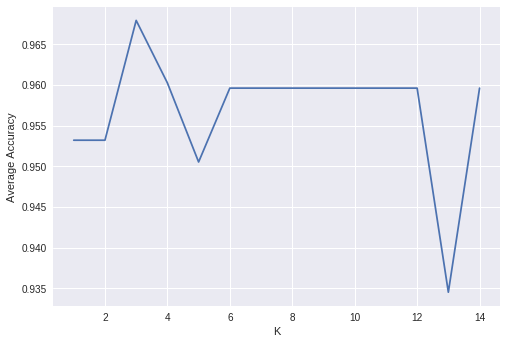

Final accuracy: 0.9629629629629629


In [8]:
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

# 1
X_n = sk.preprocessing.scale(X, with_mean=True, with_std=True)

x_train, x_test, y_train, y_test = train_test_split(X_n, Y, test_size=0.3)
y_train = y_train.ravel()

# 2
# Crear el array de Ks
K_array = list(range(1,15))


avg_scores = []

for k in K_array:
  knn = KNeighborsClassifier(n_neighbors=k,weights="distance")
  scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
  avg_scores.append(scores.mean())

# Determinar la mejor K
optimal_k = K_array[avg_scores.index(max(avg_scores))]
print(F"The optimal number of neighbors is {optimal_k}")

# Plotear la gráfica de precisión contra K.
plt.plot(K_array, avg_scores)
plt.xlabel('K')
plt.ylabel('Average Accuracy')
plt.show()

# 3

knn_opt = KNeighborsClassifier(n_neighbors=optimal_k,weights="distance")

# fitting the model
knn_opt.fit(x_train, y_train)

# evaluate accuracy
print("Final accuracy:",knn_opt.score(x_test, y_test)) 